In [1]:
from datasets import split_data, get_imagenet_dataset, get_class
from conformal_prediction import (
    softmax_conformal_score,
    get_calibration_scores,
    predict_conformal_set,
)
from torch.utils.data import DataLoader
from torchvision.models import EfficientNet_B1_Weights, efficientnet_b1
import torch
import numpy as np
from constants import IMAGENET_CLASSES_DICT
from utils import visualize_imagenet_images

In [2]:
IMAGENET_PATH = "datasets"
BATCH_SIZE = 128

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
model = efficientnet_b1(weights=EfficientNet_B1_Weights.IMAGENET1K_V1).to(device)
transform = EfficientNet_B1_Weights.IMAGENET1K_V1.transforms()

dataset = get_imagenet_dataset(IMAGENET_PATH, transform=transform)
test_dataset, calibrate_dataset = split_data(dataset, 0.1)

In [4]:
calibrate_loader = DataLoader(calibrate_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [5]:
calibration_scores = get_calibration_scores(
    model, calibrate_loader, softmax_conformal_score, device
)

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [01:17<00:00,  1.93s/it]


In [6]:
alpha = 0.1
calib_len = len(calibration_scores)
threshold = calibration_scores.quantile(
    np.ceil((calib_len + 1) * (1 - alpha)) / calib_len, interpolation="higher"
)
print(threshold)

tensor(0.9493, device='cuda:0')


In [4]:
class_subset = get_class(test_dataset, 309)
class_loader = DataLoader(class_subset, batch_size=BATCH_SIZE, shuffle=False)
print(len(class_subset))

45


Visualize the subset

/home/bubuss/source/UJ/trustworthy/projekt/utils.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


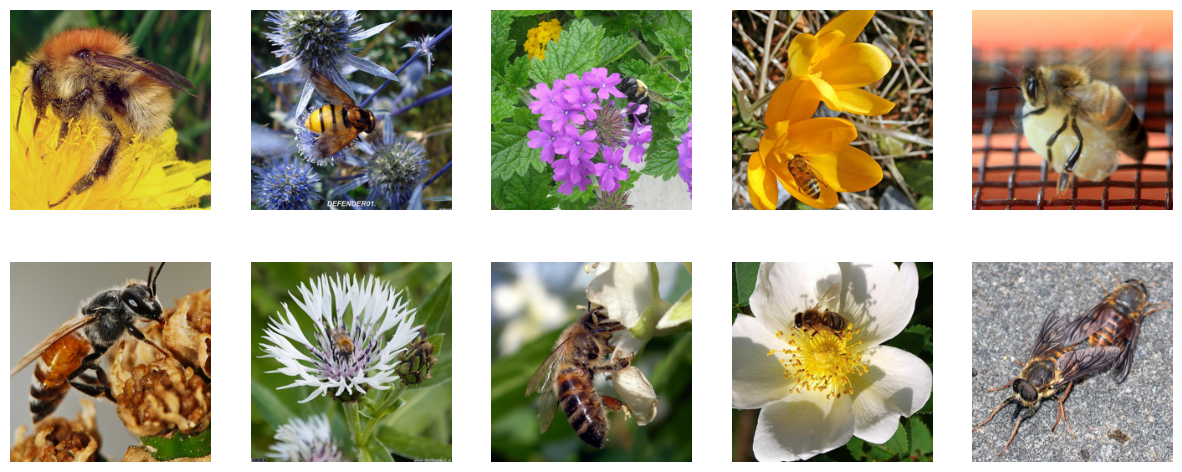

In [5]:
visualize_imagenet_images(class_subset, 10)

In [8]:
predictions_sets = predict_conformal_set(
    model, class_loader, softmax_conformal_score, threshold, device
)

100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


In [9]:
print(len(predictions_sets))

45


In [10]:
for s in predictions_sets:
    if s.ndim == 0:
        print(IMAGENET_CLASSES_DICT[s.item()])
    else:
        print([IMAGENET_CLASSES_DICT[i] for i in s])

bee
['bee', 'cardoon']
['bee', 'ant, emmet, pismire']
['bee', 'window screen']
bee
bee
bee
bee
['fly', 'bee', 'cicada, cicala']
['fly', 'bee']
['bee', 'cabbage butterfly', 'pot, flowerpot']
bee
['bee', 'cardoon']
['harvestman, daddy longlegs, Phalangium opilio', 'bee', 'cricket', 'daisy']
['apiary, bee house', 'honeycomb']
bee
['bee', 'daisy']
bee
bee
bee
['bee', 'cardoon']
['leaf beetle, chrysomelid', 'fly', 'bee', 'leafhopper']
['ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle', 'fly', 'bee']
['bee', 'honeycomb']
['bee', 'cardoon']
bee
['hummingbird', 'fly', 'bee']
bee
bee
bee
bee
['fly', 'bee']
['fly', 'bee']
['bee', 'daisy']
['bee', 'daisy']
['bee', 'honeycomb', 'screw']
['fly', 'bee']
bee
['bee', 'cardoon']
['garden spider, Aranea diademata', 'wolf spider, hunting spider', 'long-horned beetle, longicorn, longicorn beetle', 'fly', 'bee']
bee
['fly', 'bee']
bee
['goldfish, Carassius auratus', 'bee']
bee
